Notebook to investigate custom FinBERTs annotations.

In [55]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import re

In [39]:
# go to project root (ensure being in \notebooks)
project_root = Path().resolve().parents[0] 

# go to data folder
data = project_root / "data" / "processed" / "variables"

# load data
df_23 = pd.read_csv(data / "AIrel_prediction_2023.csv")
df_24 = pd.read_csv(data / "AIrel_prediction_2024.csv")

# Ensure 'date' column is in datetime format
df_23["date"] = pd.to_datetime(df_23["date"])
df_24["date"] = pd.to_datetime(df_24["date"])

In [40]:
# Create a 'year-month' column 
df_23["year_day"] = df_23["date"].dt.to_period("D")

# Count number of articles per month
daily_counts_23 = df_23.groupby("year_day")["article_id"].count().reset_index()

# Rename columns for clarity
daily_counts_23.columns = ["day", "article_count"]

# Convert period to string for display
daily_counts_23["day"] = daily_counts["day"].astype(str)

# convert article_count to int for plotting
daily_counts_23["article_count"] = daily_counts_23["article_count"].astype(int) 

daily_counts_23


,day,article_count
0,2023-01-03,2
1,2023-01-05,1
2,2023-01-06,2
3,2023-01-08,1
4,2023-01-09,5
...,...,...
343,2023-12-27,22
344,2023-12-28,19
345,2023-12-29,14
346,2023-12-30,4


In [41]:
# Create a 'year-month' column 
df_24["year_day"] = df_24["date"].dt.to_period("D")

# Count number of articles per month
daily_counts_24 = df_24.groupby("year_day")["article_id"].count().reset_index()

# Rename columns for clarity
daily_counts_24.columns = ["day", "article_count"]

# Convert period to string for display
daily_counts_24["day"] = daily_counts["day"].astype(str)

# convert article_count to int for plotting
daily_counts_24["article_count"] = daily_counts_24["article_count"].astype(int) 

daily_counts_24


,day,article_count
0,2023-01-03,39
1,2023-01-05,71
2,2023-01-06,43
3,2023-01-08,54
4,2023-01-09,52
...,...,...
361,NaN,48
362,NaN,11
363,NaN,31
364,NaN,42


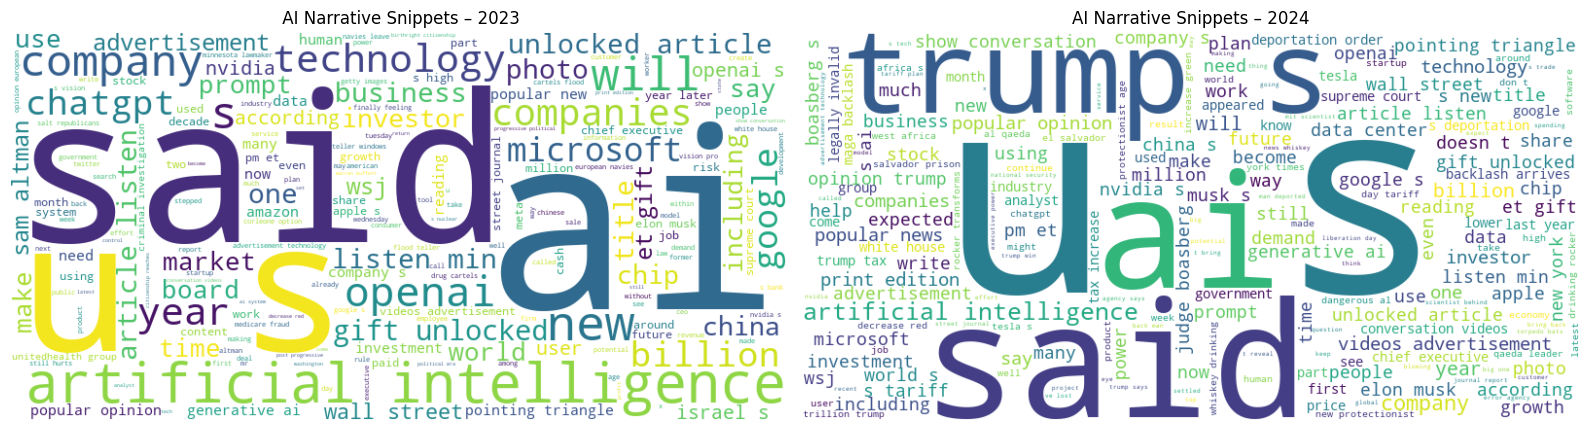

In [43]:
# subset 2023 due to small samplesize prior April 2023
df_23_subset = df_23[df_23["date"] > pd.to_datetime("2023-03-30")]
df_unlabeled = pd.concat([df_23_subset, df_24], ignore_index=True)

# helper function
def preprocess(texts):
    text = " ".join(texts)
    return text.lower()

# Split by year
text_2023 = preprocess(df_unlabeled[df_unlabeled["date"].dt.year == 2023]["ai_window"].dropna())
text_2024 = preprocess(df_unlabeled[df_unlabeled["date"].dt.year == 2024]["ai_window"].dropna())

# create wordclouds
wc_2023 = WordCloud(width=800, height=400, background_color='white').generate(text_2023)
wc_2024 = WordCloud(width=800, height=400, background_color='white').generate(text_2024)

# plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_2023, interpolation='bilinear')
plt.axis('off')
plt.title(" AI Narrative Snippets – 2023")

plt.subplot(1, 2, 2)
plt.imshow(wc_2024, interpolation='bilinear')
plt.axis('off')
plt.title("AI Narrative Snippets – 2024")

plt.tight_layout()
plt.savefig(project_root / "reports" / "figures"/ "wordcloud_FinBERT_2.png")
plt.show()


In [44]:
# ivnestigate means
print(df_23_subset.predicted_label.mean())
print(df_23.predicted_label.mean())
print(df_24.predicted_label.mean())

0.106205543291636
0.1061122472165417
0.1235754189944134


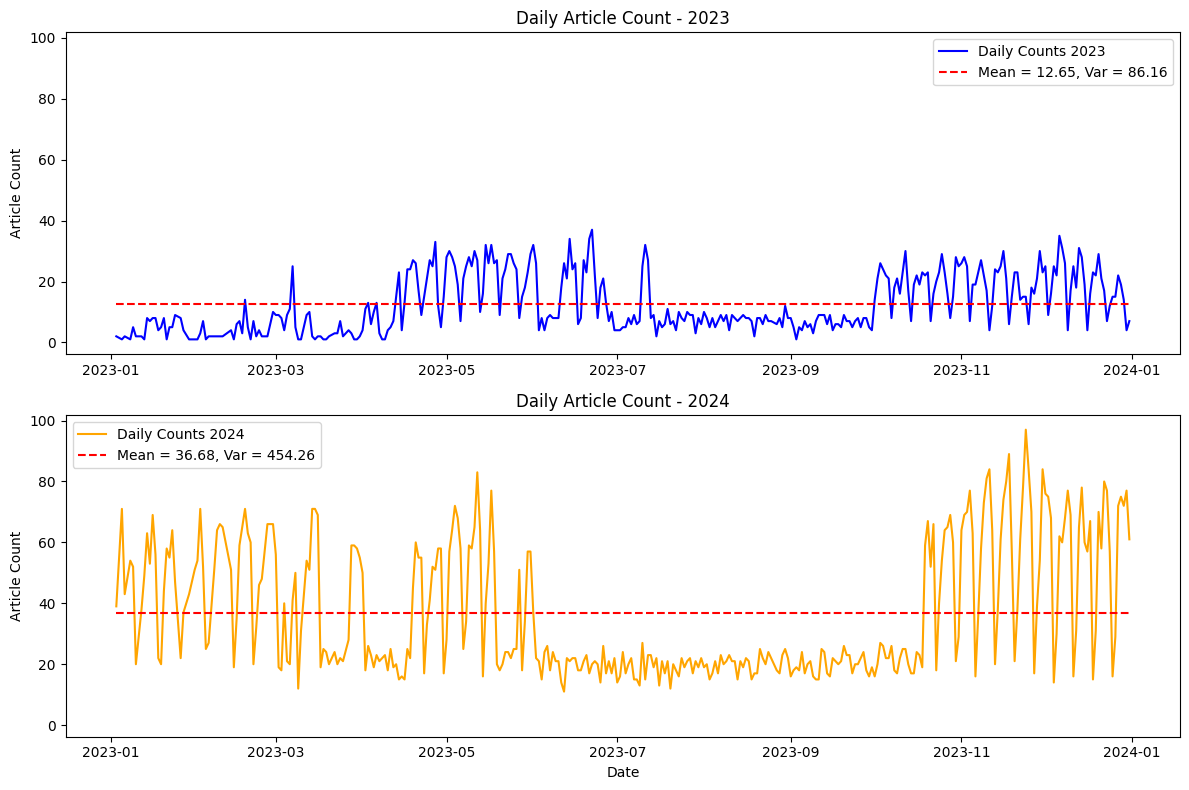

In [59]:
# Ensure 'day' columns are datetime
daily_counts_23["day"] = pd.to_datetime(daily_counts_23["day"], errors="coerce")
daily_counts_24["day"] = pd.to_datetime(daily_counts_24["day"], errors="coerce")

# === Calculate Summary Statistics ===

# 2023
mean_count_23 = daily_counts_23["article_count"].mean()
var_count_23 = daily_counts_23["article_count"].var()

# 2024
mean_count_24 = daily_counts_24["article_count"].mean()
var_count_24 = daily_counts_24["article_count"].var()

# === Plotting ===

# Create 2 stacked subplots, sharing y-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

# === Plot for 2023 ===

# Plot article counts
axes[0].plot(
    daily_counts_23["day"],
    daily_counts_23["article_count"],
    color="blue"
)

# Draw mean as horizontal dashed line (excluded from legend)
axes[0].hlines(
    y=mean_count_23,
    xmin=daily_counts_23["day"].min(),
    xmax=daily_counts_23["day"].max(),
    color="red",
    linestyle="--",
    label="_nolegend_"
)

# Custom legend showing mean and variance
legend_elements_23 = [
    Line2D([0], [0], color='blue', label='Daily Counts 2023'),
    Line2D([0], [0], color='red', linestyle='--',
           label=f'Mean = {mean_count_23:.2f}, Var = {var_count_23:.2f}')
]
axes[0].legend(handles=legend_elements_23)

# Title and labels
axes[0].set_title("Daily Article Count - 2023")
axes[0].set_ylabel("Article Count")

# === Plot for 2024 ===

# Plot article counts
axes[1].plot(
    daily_counts_24["day"],
    daily_counts_24["article_count"],
    color="orange"
)

# Draw mean as horizontal dashed line (excluded from legend)
axes[1].hlines(
    y=mean_count_24,
    xmin=daily_counts_24["day"].min(),
    xmax=daily_counts_24["day"].max(),
    color="red",
    linestyle="--",
    label="_nolegend_"
)

# Custom legend showing mean and variance
legend_elements_24 = [
    Line2D([0], [0], color='orange', label='Daily Counts 2024'),
    Line2D([0], [0], color='red', linestyle='--',
           label=f'Mean = {mean_count_24:.2f}, Var = {var_count_24:.2f}')
]
axes[1].legend(handles=legend_elements_24)

# Title and labels
axes[1].set_title("Daily Article Count - 2024")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Article Count")

# === Final Layout ===
plt.tight_layout()
plt.savefig(project_root / "reports" / "figures" / "article_count_23_24.png" )
plt.show()
